# DSCI 100 002: Group Project Report 

Group 23: Tingyu Chen, Eric Leung, Yiming Li, Minzhang Si

## Title: Assessing Student Knowledge
## I. Introduction 
Students attend academic institutions to build knowledge over a particular domain. There is research of students reporting that maturation did not increase academics but non-academic activities such as internships did (Binder et al. 2014); this suggests that using related knowledge in different settings may predict stronger development of knowledge for the domain of interest but time spent on unrelated matters may not. An opposition to the non-academic activities would be that not all interns are given the opportunity to develop in their roles (Holyoak, 2013). Thus, the issue arises when we take all these variables into consideration to predict the knowledge levels of a particular person.

The objective of this project is to predict knowledge levels based on these variables: study time and academic understanding through exam performance, sub-categorized by goal object materials and related objects to goal object, in addition to repetition of users for goal object materials for the prediction with in mind of the opposing sides of research. As all the input variables are quantitative and the desired output is categorical, we will be using classification as our method for this project.

The data set is taken from a Ph.D. thesis by Kahraman, Sagiroglu and Colak which is a real data set in regards to students’ knowledge status on electrical DC Machines. Our target will be the knowledge level of users (UNS) divided between four levels, and determined by the input values STG (Degree of study time for goal object materials), STR (Degree of study time of user for related objects with goal object), LPR (Exam performance of user for related objects with goal object), PEG (Exam performance of user for goal objects), and SCG (Degree of repetition number of user for goal object materials).

## II. Method and Results

We use classification with K-nearest neighbours as the main method for the project. The goal of the project is to predict the categorical variable of interest — UNS given all other five indicator variables. **Can we use the 5 known variables to predict the knowledge class of the users?**

#### Step 1: Exploring the user knowledge data set
The first step is to load, wrangle, and explore the data. After installing all the necessary packages, we download the data set from the UCIV archives and store it into our data folder. The data set has already been wrangled and split into training and testing data, we use the “read_excel” function and “sheet =“ argument to read in them accordingly. The set of variables per observation in this data set that we need is (justification see later section): 

1. STG: the degree of study time for goal object materials
2. SCG: the degree of repetition number of user for goal object materials
3. STR: the degree of study time of user for related objects 
4. LPR: the exam performance of user for related objects with goal objects
5. PEG: the exam performance of user for goal objects
6. UNS: The knowledge level of user

In [22]:
# install packages
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library("readxl")
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)

In [23]:
# load the data set

set.seed(9999)
project_information <-
  read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls")
user_training_data <- 
  read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",
             sheet = "Training_Data")
user_testing_data <- 
  read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", 
             sheet = "Test_Data")

head(project_information)
head(user_training_data)
head(user_testing_data)

New names:
* `` -> ...2

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



Data Set Characteristics: Multivariate,...2,Attribute Information:
<chr>,<lgl>,<chr>
Number of Instances: 403,NA,"STG (The degree of study time for goal object materails),"
Area: Education,NA,SCG (The degree of repetition number of user for goal object materails)
Attribute Characteristics: Real,NA,STR (The degree of study time of user for related objects with goal object)
Number of Attributes: 5,NA,LPR (The exam performance of user for related objects with goal object)
Associated Tasks: Classification,NA,PEG (The exam performance of user for goal objects)
NA,NA,UNS (The knowledge level of user)


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)


There is a tiny difference between the training and testing set. We use string replace function to make both sets are exactly same in the UNS column. The dataset also contains some irrelevant columns, so we use select function to get the columns we needed.

Then, we use the “as_factor” function to convert UNS from character type into factor type because we will be working with UNS as a categorical variable. We can see from glimpse in the code above that the training set contains 258 observations and the testing set contains 145 observations. Since the training set has approximately 64% observations, it will give us an accurate model. The summary table tabulated by the “group_by” and “summarize” functions returns four different UNS values with their respective percentage in each group: High (24.42%), Low(32.17%), Middle(34.11%), very_low(9.30%). 

In [24]:
# change string label
set.seed(9999)
user_testing_data$UNS <- str_replace(user_testing_data$UNS, 
                                     "Very Low", "very_low")

In [25]:
# select columns
set.seed(9999)
user_training_data <- select(user_training_data, STG, SCG, STR, LPR, PEG, UNS)
user_testing_data <- select(user_testing_data, STG, SCG, STR, LPR, PEG, UNS)

In [26]:
# change to factor
set.seed(9999)
user_training_data <- user_training_data %>% mutate(UNS = as.factor(UNS))
user_testing_data <- user_testing_data %>% mutate(UNS = as.factor(UNS))

In [27]:
# overview of data
glimpse(user_training_data)
glimpse(user_testing_data)

Rows: 258
Columns: 6
$ STG <dbl> 0.00, 0.08, 0.06, 0.10, 0.08, 0.09, 0.10, 0.15, 0.20, 0.00, 0.18,…
$ SCG <dbl> 0.00, 0.08, 0.06, 0.10, 0.08, 0.15, 0.10, 0.02, 0.14, 0.00, 0.18,…
$ STR <dbl> 0.00, 0.10, 0.05, 0.15, 0.08, 0.40, 0.43, 0.34, 0.35, 0.50, 0.55,…
$ LPR <dbl> 0.00, 0.24, 0.25, 0.65, 0.98, 0.10, 0.29, 0.40, 0.72, 0.20, 0.30,…
$ PEG <dbl> 0.00, 0.90, 0.33, 0.30, 0.24, 0.66, 0.56, 0.01, 0.25, 0.85, 0.81,…
$ UNS <fct> very_low, High, Low, Middle, Low, Middle, Middle, very_low, Low, …
Rows: 145
Columns: 6
$ STG <dbl> 0.00, 0.05, 0.08, 0.20, 0.22, 0.14, 0.16, 0.12, 0.20, 0.16, 0.11,…
$ SCG <dbl> 0.10, 0.05, 0.18, 0.20, 0.22, 0.14, 0.16, 0.12, 0.20, 0.25, 0.29,…
$ STR <dbl> 0.50, 0.55, 0.63, 0.68, 0.90, 0.70, 0.80, 0.75, 0.88, 0.01, 0.20,…
$ LPR <dbl> 0.26, 0.60, 0.60, 0.67, 0.30, 0.50, 0.50, 0.68, 0.77, 0.10, 0.05,…
$ PEG <dbl> 0.05, 0.14, 0.85, 0.85, 0.90, 0.30, 0.50, 0.15, 0.80, 0.07, 0.66,…
$ UNS <fct> very_low, Low, High, High, High, Low, Middle, Low, High, very_low…


In [28]:
# counts by UNS level
set.seed(9999)
summary <- user_training_data %>%
group_by(UNS) %>%
summarize(count=n()) %>%
    mutate(percent = 100*count/nrow(user_training_data))
summary

`summarise()` ungrouping output (override with `.groups` argument)



UNS,count,percent
<fct>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
very_low,24,9.302326


The reason we choose all five indicator variables from the data set is based on the hypothesis that we made about the relationship between indicator variables and the UNS. We hypothesize that 
1) the longer one studies (for either goal object or related objects), the higher the knowledge level of user
2) the better the exam performance (in either goal object or related objects), the higher the knowledge level of user 
3) the more time one repeats the materials, the higher the knowledge level of users

We test these hypotheses by visualizing the relationship between each indicator variable with the variable of interest, UNS, using the ggpair function.

The plots below show the relationship between the five indicator variables and the UNS variable that we are interested in predicting. From the box plots, it is clear that almost all variables have a positive relationship with UNS. For example, for those who obtained high UNS, they are also more likely to spent longer time to study for both goal objects (STG) and related objects (STR); more likely to repeat the goal object material (SCG); and have obtained higher exam grade in goal object (PEG). The only exception is the varaible LPR, the exam grade for related object, where this relationship is less clear. In this regard, we begin our k-nearest neighbours classification by excluding the LPR variable.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



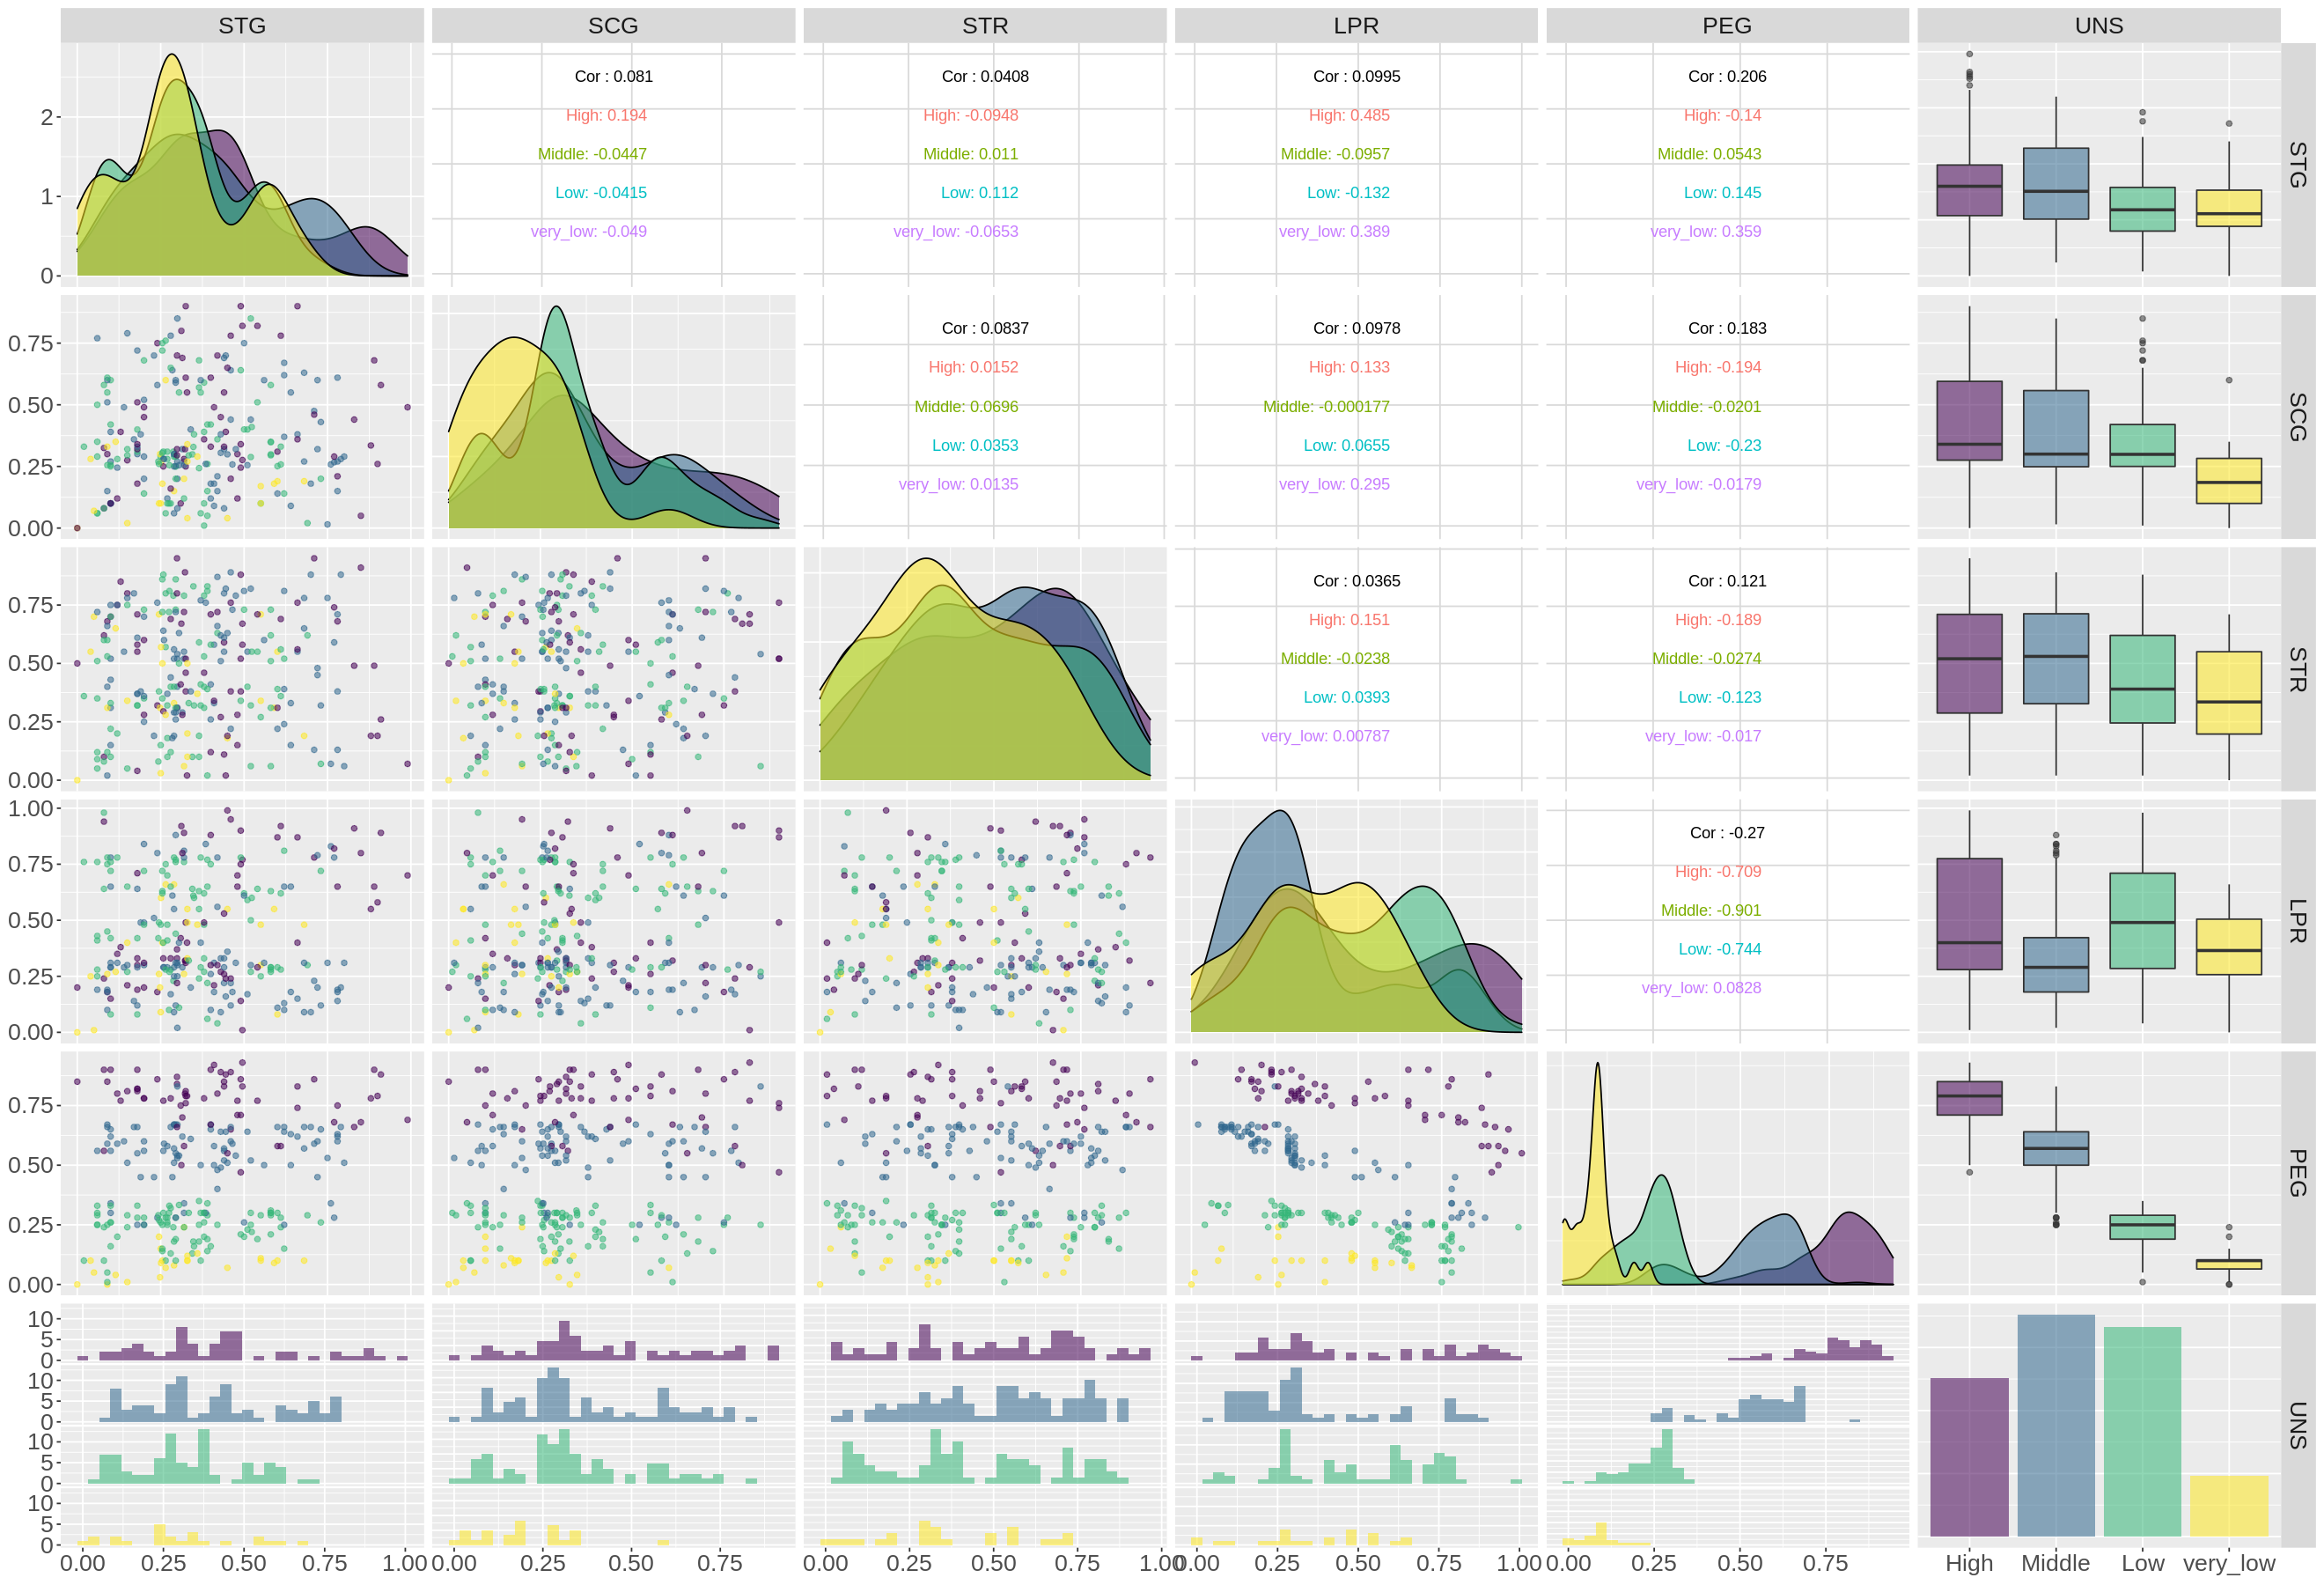

In [29]:
set.seed(9999)
library(RColorBrewer)
user_training_data$UNS <- ordered(user_training_data$UNS,levels=c("High","Middle","Low","very_low"))
user_testing_data$UNS<-ordered(user_testing_data$UNS, levels=c("High","Middle","Low","very_low"))
pm_pairs<-user_training_data %>%
    ggpairs(aes(alpha = 0.4, col = UNS)) +
    theme(text = element_text(size = 20))
options(repr.plot.width = 22, repr.plot.height = 15)
pm_pairs

#### Step 2: Classification with k-nearest neighbours 


**Classification with 4 predictor variables (excluding LPR)**

Before using the K-nearest neighbour classification, we standardize all variables in the training dataset since the algorithm is sensitive to the scale of the predictors; we set the seed for the purpose of consistency and reproducibility. 

For the knn classification algorithm, we pass the parameter k into the model that determines how many neighbors will affect the class vote. 

First, we tune the model to find the best value of k. We chose a 5-fold cross-validation because our training set only contains 258 observations, which does not have enough data to train if we split it into too many sets. Also, picking a large number of folds will take a longer time to run in practice. 

Then, we create the data analysis workflow by adding the recipe and model. Instead of using fit or fit_resamples, we use tune_grid function to fit our model. We set a k value from 1 to 30 by 1 since a larger k value will spend too much time and may crush the kernel. We believe that using k values from 1 to 30 can show the overfitting/underfitting problems if they exist. The collect_metrics function helps to calculate the mean and standard error of the accuracy across the folds.

Finally, the accuracy graph visualizes the relationship between the value and the accuracy of the estimates. Based on that, we can observe which k values will provide the best accuracy.

In [30]:
# select the relevant columns
set.seed(9999)
user_training_data_nolpr<-user_training_data %>%
    select(STG,SCG,STR,PEG,UNS)
user_testing_data_nolpr<-user_testing_data %>%
    select(STG,SCG,STR,PEG,UNS)

In [31]:
# standardize the data
set.seed(9999)
user_recipe_nolpr<-recipe(UNS ~., data = user_training_data_nolpr) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

In [32]:
# tune the classifier
set.seed(9999)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [33]:
# cross validation
set.seed(9999)
user_vfold_nolpr <- vfold_cv(user_training_data_nolpr, v = 5, strata = UNS)

In [34]:
# results 
set.seed(9999)
k_vals_nolpr <- tibble(neighbors = seq(from = 1, to = 30, by = 1))
knn_results_nolpr <- workflow() %>%
  add_recipe(user_recipe_nolpr) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = user_vfold_nolpr, grid = k_vals_nolpr) %>%
  collect_metrics()

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6706481,5,0.02674748,Model01
2,accuracy,multiclass,0.6360969,5,0.02680472,Model02
3,accuracy,multiclass,0.7052607,5,0.04027702,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,multiclass,0.7164971,5,0.04127888,Model28
29,accuracy,multiclass,0.6974840,5,0.03520677,Model29
30,accuracy,multiclass,0.7089586,5,0.03667380,Model30


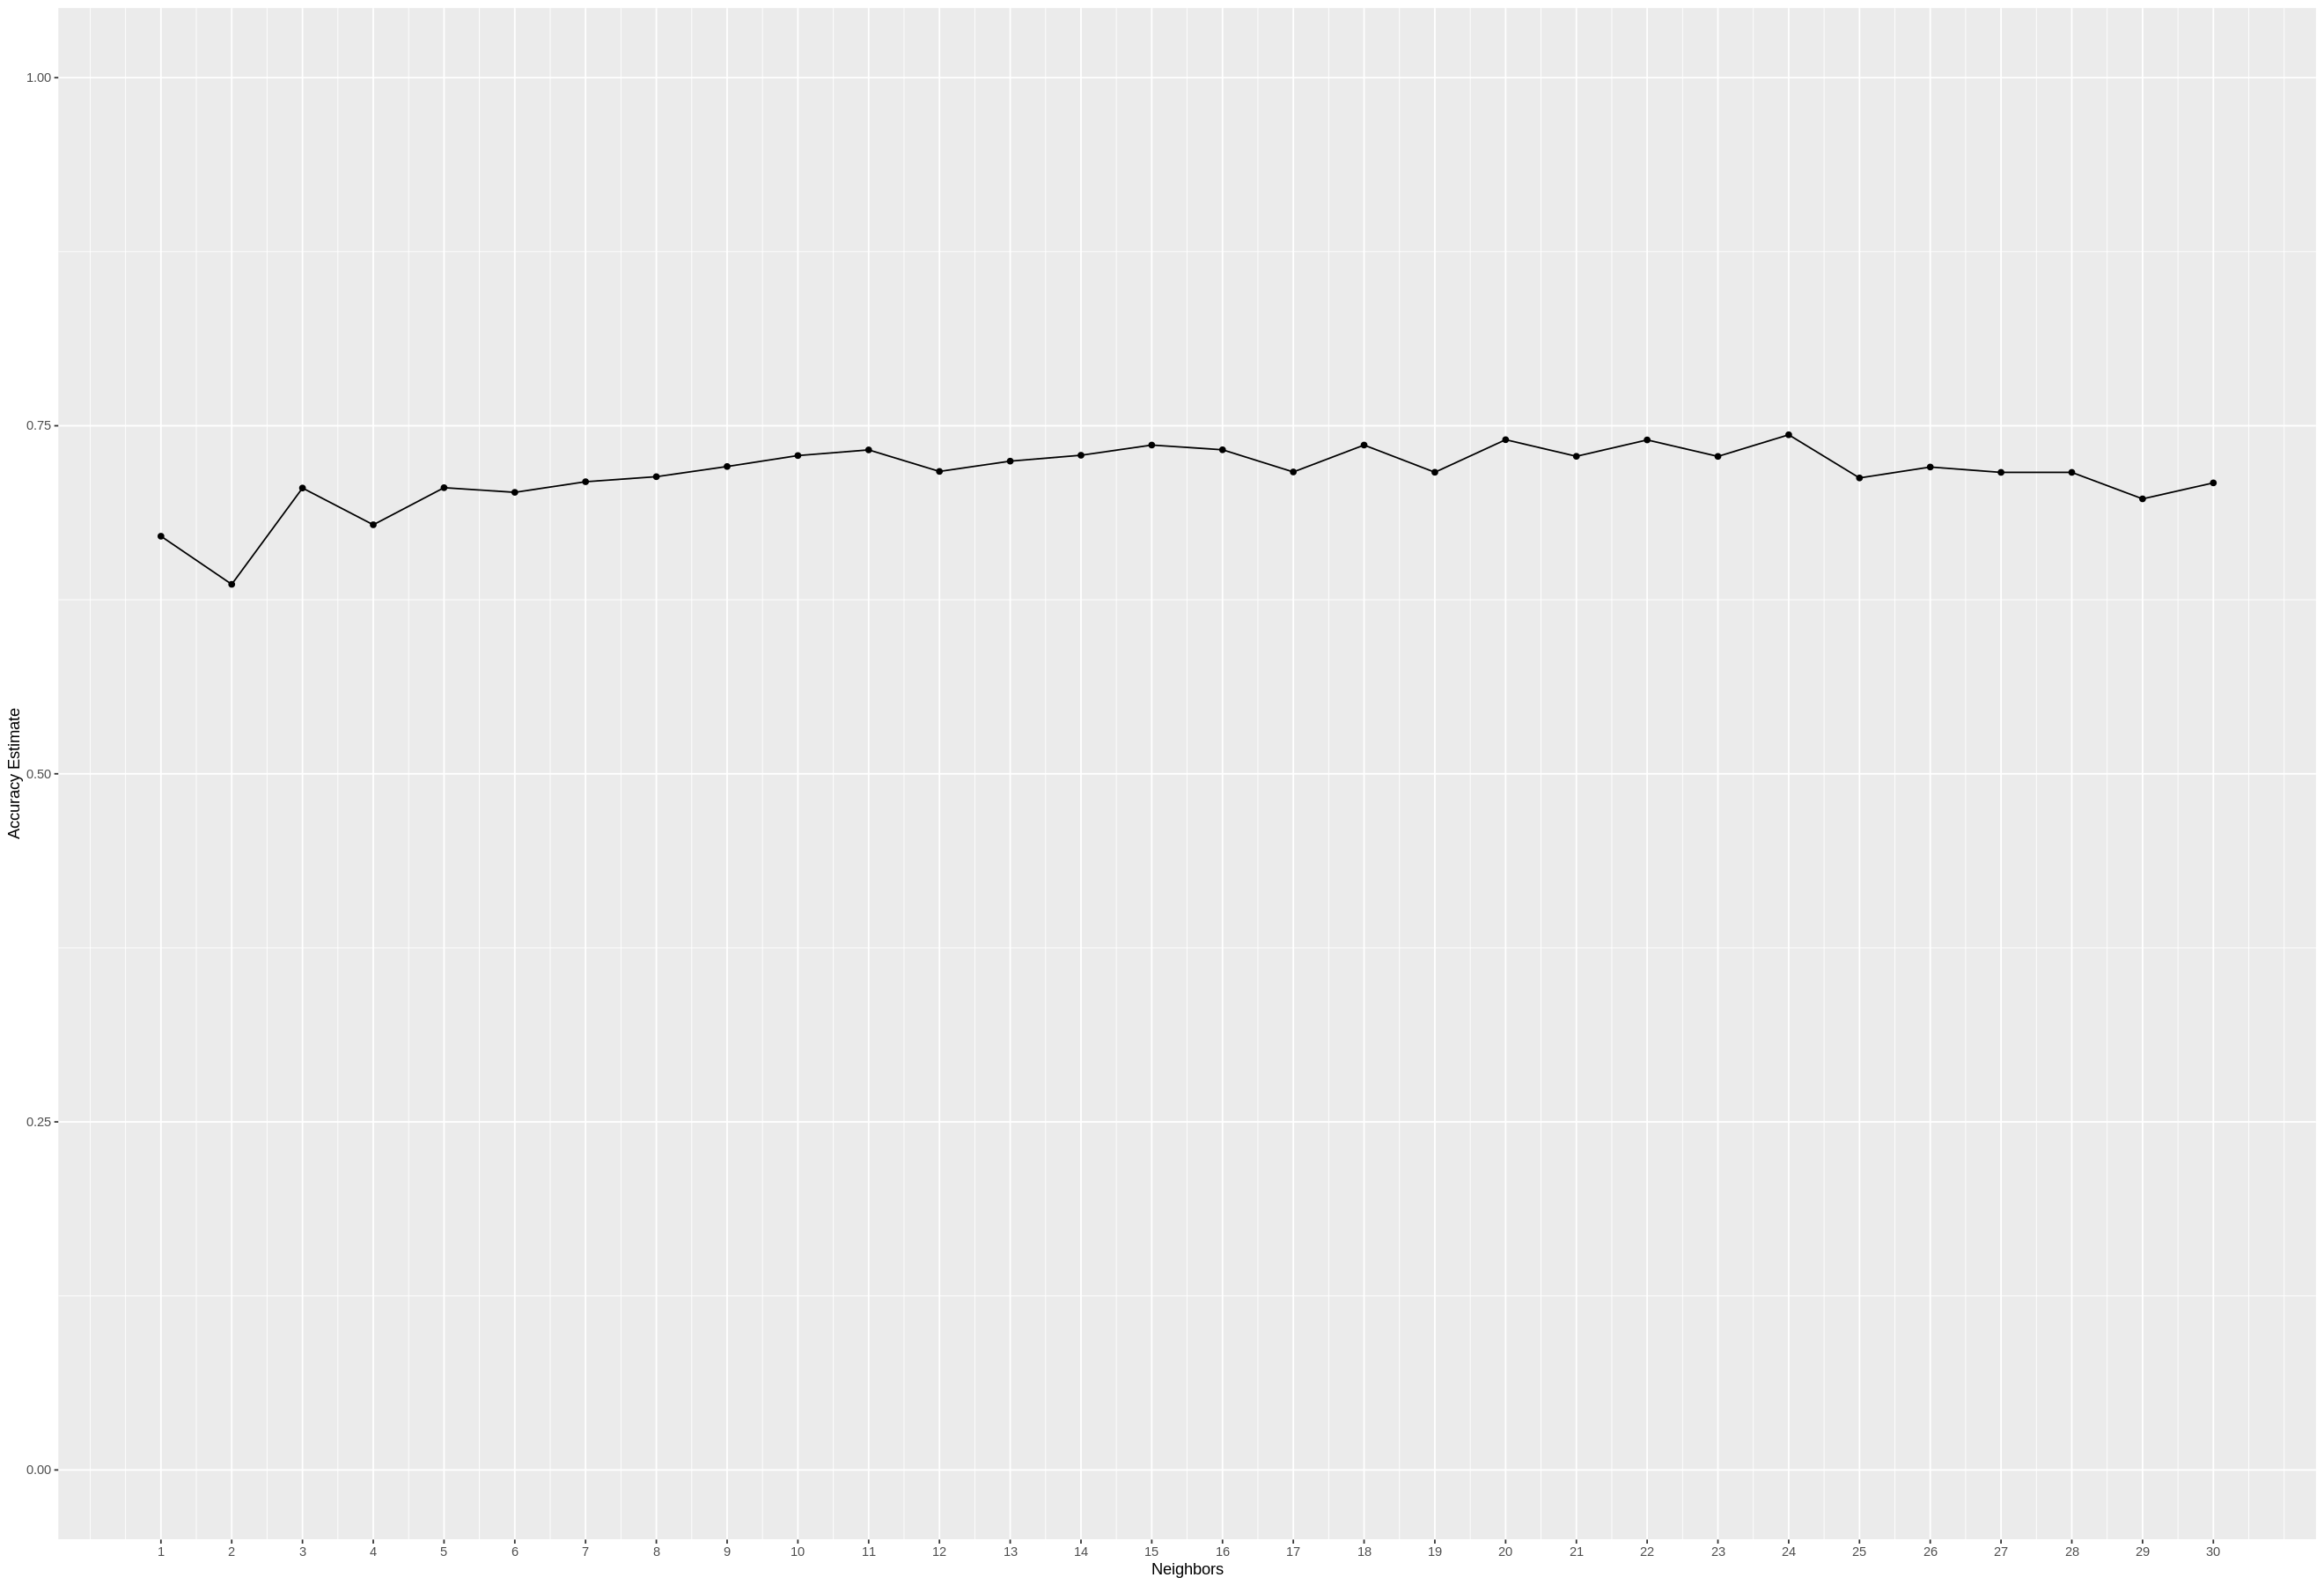

In [35]:
# accuracy plot(find k)
set.seed(9999)
accuracies_nolpr <- knn_results_nolpr %>% 
  filter(.metric == "accuracy")
accuracy_versus_k_nolpr <- ggplot(accuracies_nolpr, aes(x = neighbors, y = mean))+
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  scale_x_continuous(breaks = seq(1, 30, by = 1)) +
  scale_y_continuous(limits = c(0, 1.0)) 
accuracies_nolpr
accuracy_versus_k_nolpr

From the accuracy plot, we find that our prediction accuracy is quite consistent regardless of the k value. Nonetheless, we take k = 15 to be our ideal k value as it is one of the k values with the higher accuracy estimates, and is consistent in its accuracy estimates with k values around it.

We pass neighbours equal to 15 in our model specification and use the training data to fit our model.

Then we use our final model to predict the test dataset. The table below shows the result of our prediction. By only looking at the prediction result, it does not mean anything, we must calculate the accuracy to understand how well our model is. We show this under the table of predictions.

In [36]:
#make model(knn_spec), k = 15
set.seed(9999)
knn_spec_nolpr <- nearest_neighbor(weight_func = "rectangular",
                                 neighbors = 15) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [37]:
#fit the model
set.seed(9999)
user_fit_nolpr <- workflow() %>%
  add_recipe(user_recipe_nolpr) %>%
  add_model(knn_spec_nolpr) %>%
  fit(data = user_training_data_nolpr)


In [38]:
#prediction
set.seed(9999)
user_test_predictions_nolpr <- predict(user_fit_nolpr, user_testing_data_nolpr) %>%
  bind_cols(user_testing_data_nolpr)
user_test_predictions_nolpr

.pred_class,STG,SCG,STR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
Low,0.00,0.10,0.50,0.05,very_low
Low,0.05,0.05,0.55,0.14,Low
High,0.08,0.18,0.63,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
Middle,0.56,0.60,0.77,0.32,Low
Middle,0.66,0.68,0.81,0.57,Middle
Middle,0.68,0.64,0.79,0.24,Middle


In [39]:
set.seed(9999)
user_prediction_accuracy_nolpr <- user_test_predictions_nolpr %>%
  metrics(truth = UNS, estimate = .pred_class) 
user_prediction_accuracy_nolpr

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7034483
kap,multiclass,0.5854113


We can see that our accuracy estimate is around 70%. This is not too bad. However, we still want to see if there are ways that we could possibly improve the accuracy of our prediction. In this case, we add the LPR variable which we have left out in the previous model to see if it will change our results. 

**Classification with all 5 predictor variables**

We repeat the same steps as we did above except we include all five indicator variables into the classification model. 

In [40]:
#recipe made
set.seed(9999)
user_recipe <- recipe(UNS ~ ., data = user_training_data) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

In [41]:
#cross validation
set.seed(9999)
user_vfold <- vfold_cv(user_training_data, v = 5, strata = UNS)

In [42]:
#result
set.seed(9999)
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))
knn_results <- workflow() %>%
  add_recipe(user_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = user_vfold, grid = k_vals) %>%
  collect_metrics()

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7906654,5,0.007135904,Model01
2,accuracy,multiclass,0.7639602,5,0.029411319,Model02
3,accuracy,multiclass,0.7982968,5,0.043436260,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,multiclass,0.6704829,5,0.02503564,Model28
29,accuracy,multiclass,0.6551767,5,0.02888494,Model29
30,accuracy,multiclass,0.6474815,5,0.03060573,Model30


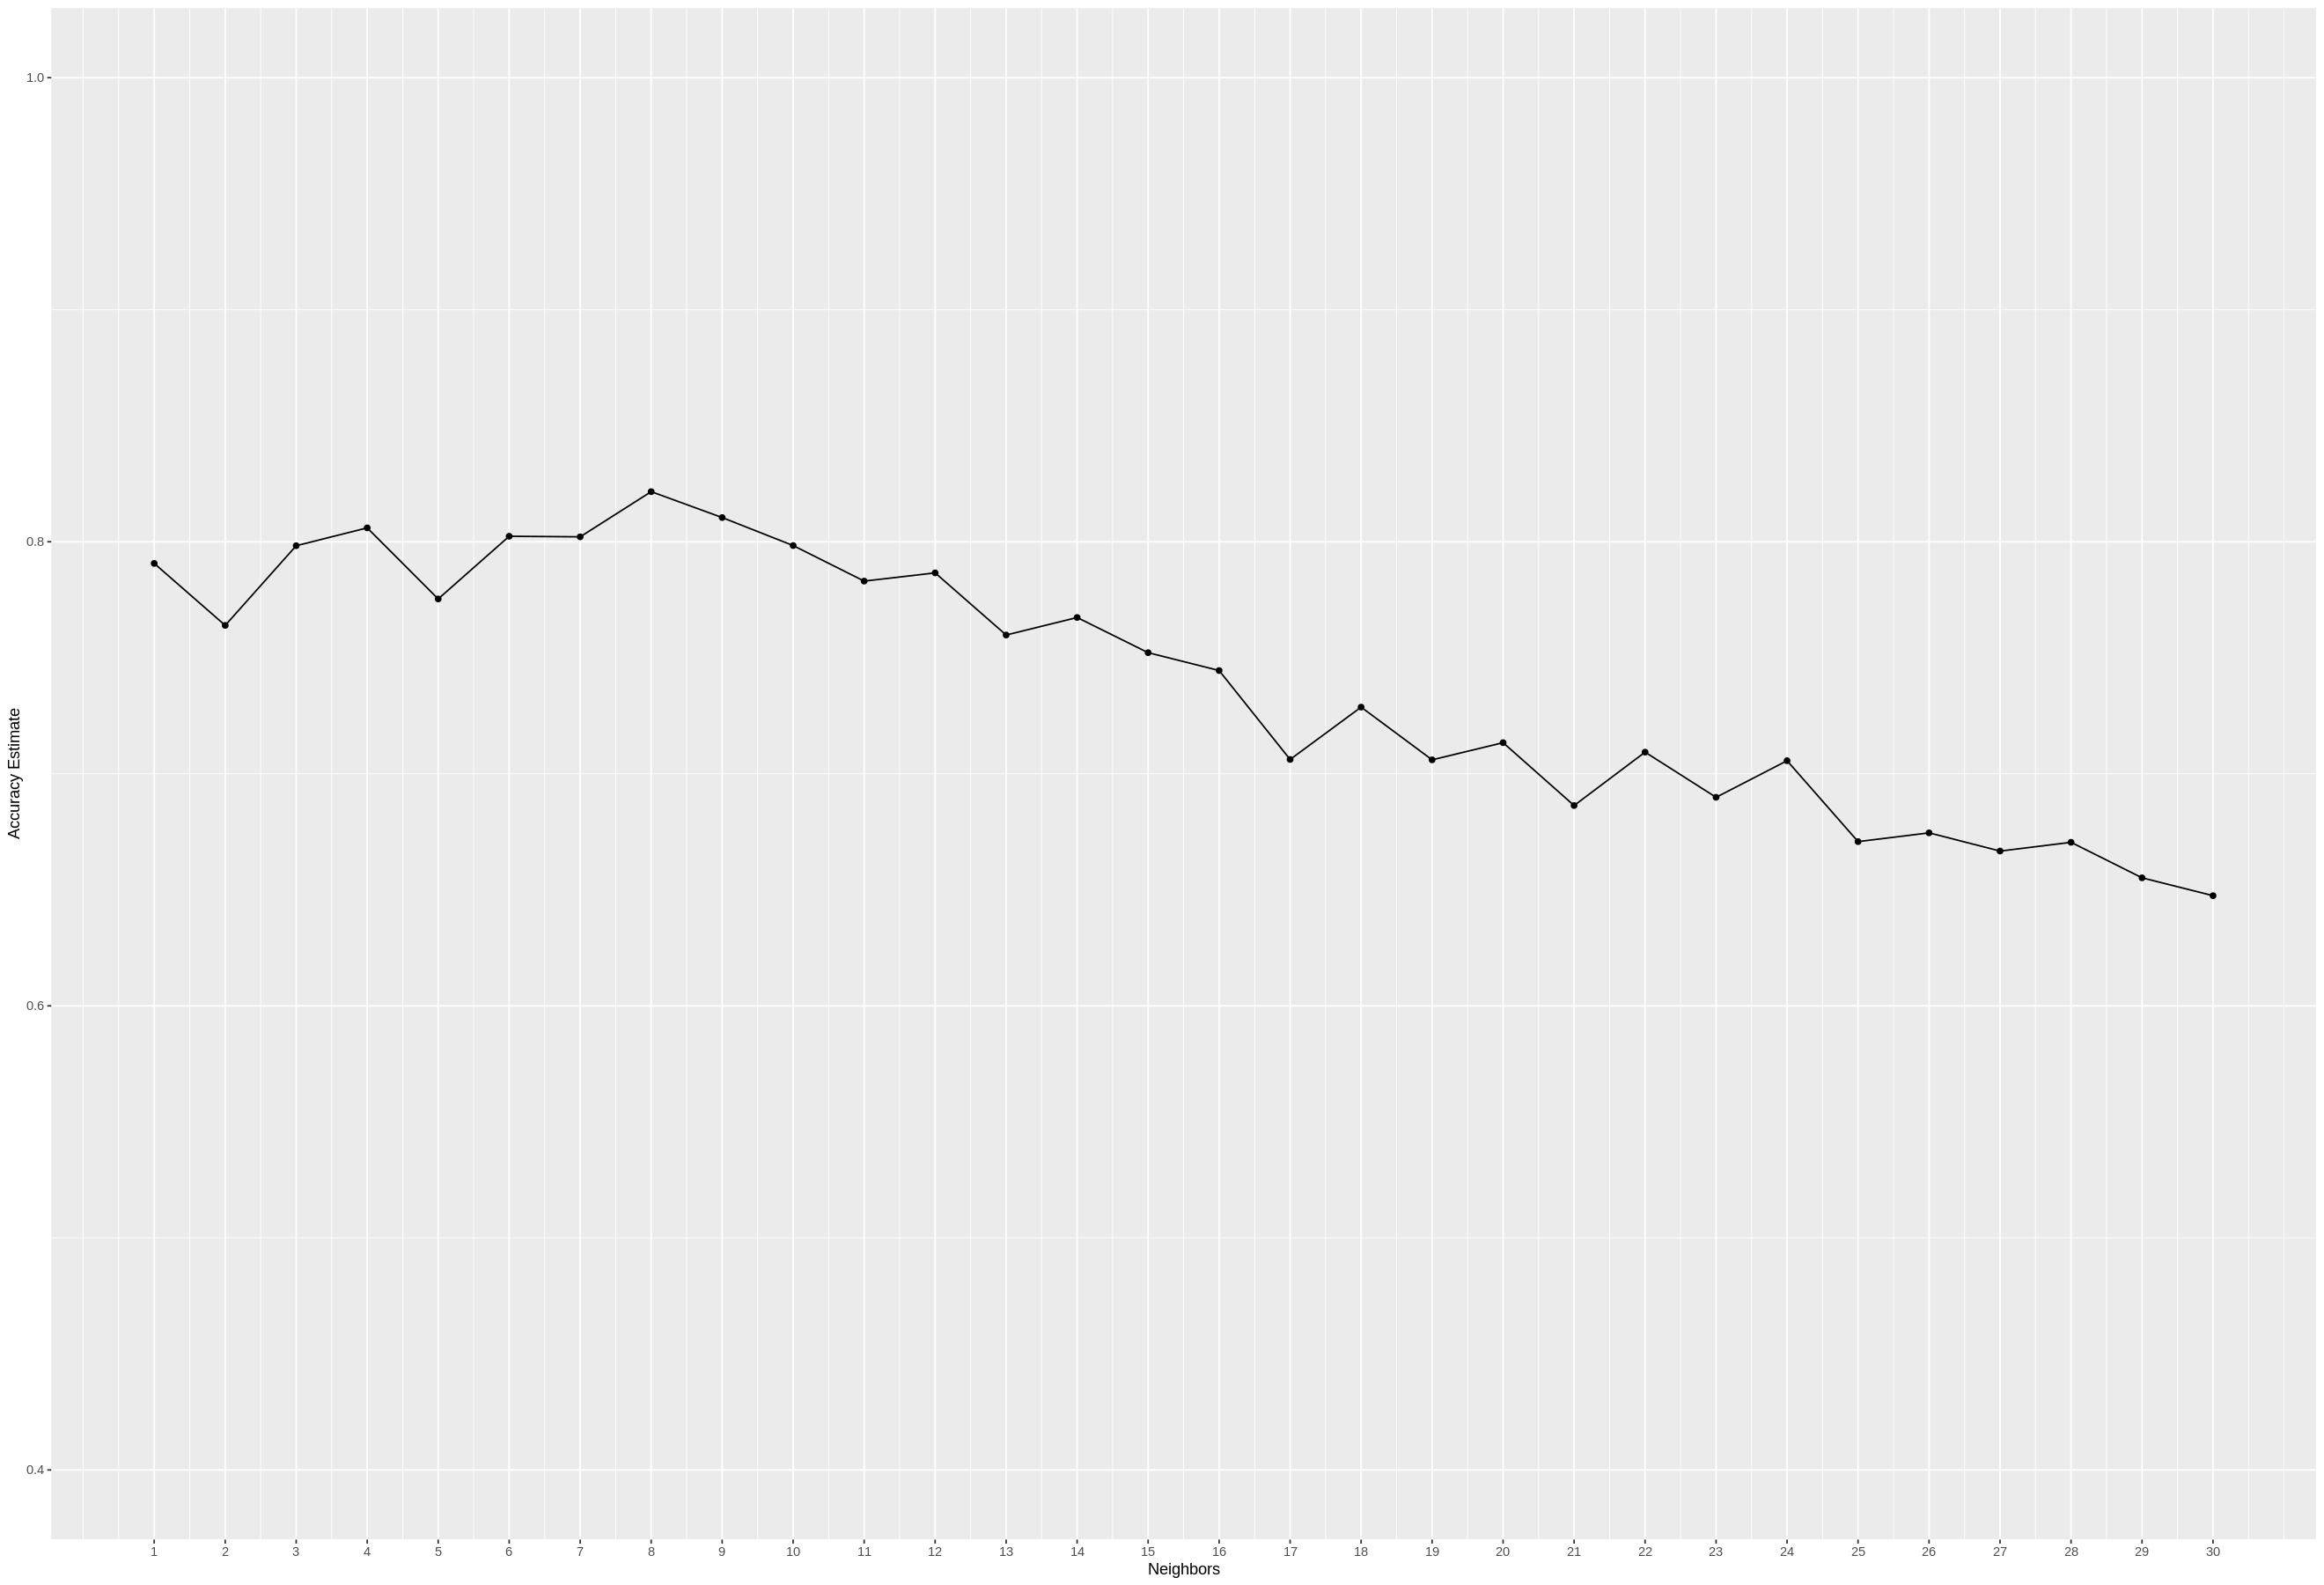

In [43]:
#plot(find k)
set.seed(9999)
accuracies <- knn_results %>% 
  filter(.metric == "accuracy")
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  scale_x_continuous(breaks = seq(1, 30, by = 1)) +
  scale_y_continuous(limits = c(0.4, 1.0)) 
accuracies
accuracy_versus_k

By looking at the graph above, we can see that there exists an overfitting problem if we keep increasing the k value. In addition, we find that the best k value which optimizes the accuracy to be around k = 8. We will further use k = 8 as our neighbours in our modeling.

We pass neighbours equal to 8 in our model specification and use the training data to fit our model.

Then we use our final model to predict the test dataset. The table below shows the result of our prediction. By only looking at the prediction result, it does not mean anything, we must calculate the accuracy to understand how well our model is. We show this under the table of predictions.

Finally, we look at the confusion matrix for the classifier, which tells us the correctness of the predicted result in each category.

In [44]:
#make model(knn_spec), k = 8
set.seed(9999)
knn_spec_end <- nearest_neighbor(weight_func = "rectangular",
                                 neighbors = 15) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [45]:
#fit the model
set.seed(9999)
user_fit_end <- workflow() %>%
  add_recipe(user_recipe) %>%
  add_model(knn_spec_end) %>%
  fit(data = user_training_data)

In [46]:
#prediction
set.seed(9999)
user_test_predictions_end <- predict(user_fit_end, user_testing_data) %>%
  bind_cols(user_testing_data)
user_test_predictions_end

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
Low,0.05,0.05,0.55,0.60,0.14,Low
High,0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Middle,0.56,0.60,0.77,0.13,0.32,Low
Middle,0.66,0.68,0.81,0.57,0.57,Middle
Middle,0.68,0.64,0.79,0.97,0.24,Middle


In [47]:
#prediction accuracy
set.seed(9999)
user_prediction_accuracy_end <- user_test_predictions_end %>%
  metrics(truth = UNS, estimate = .pred_class) 
user_prediction_accuracy_end

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7724138
kap,multiclass,0.6836154


In [48]:
#show the mat
set.seed(9999)
user_mat_end <- user_test_predictions_end %>% 
  conf_mat(truth = UNS, estimate = .pred_class) 
user_mat_end

          Truth
Prediction High Middle Low very_low
  High       35      0   0        0
  Middle      4     26   2        0
  Low         0      8  44       19
  very_low    0      0   0        7

From the accuracy table, we see that the .estimate value has increased to 78%; about 8% higher than the previous value if we exclude the LPR variable. This indicates that the LPR variable may have predictive power to a certain extent. Again, we think that 78% accuracy is not bad as there is always error for predictive modeling. The fact that we could in some way, using one's study time, exam grade, etc., predict knowledge level with a 78% accuracy fulfills the purpose of predictive modeling. 

## III. Discussion, Expected Outcome, Impact, and Future Questions

Basing our initial judgment off of correlation, then with estimation accuracy, we find that all five variables have some predictive power for the UNS level for classification. This result is consistent with our earlier hypotheses and justifies our decision of using all variables in the dataset for tuning the classifier and predicting the key variable, UNS. We consider our final estimation 78% as a good accuracy value because there will always be error in predictive modeling and we have increased the accuracy given the variables in the data set.

Based on our results, we can say that with data on the time a person spends and the examination scores of that person for the topics of interests and related topics, in addition to repetition of the materials of the topics are good indicators for predicting a person's knowledge on the topic.

**Future Questions and Limitations**
1. Are there any other factors that could possibly increase the accuracy of predicting UNS levels? If so, are we able to quantify the factors and incorporate into our model to further increase the accuracy of the classification? 
2. There could be further research on why these five variables increase the prediction of knowledge of users. Is there causality between the variables and knowledge?
3. How would our prediction levels change with more data?
4. Would predictions be widely different if the data set was on a different focus group such as a different subject?

## IV. Reference
Binder, Jens F., et al. "The Academic Value of Internships: Benefits Across Disciplines and Student Backgrounds." Contemporary Educational Psychology, vol. 41, 2015, pp. 73-82.

Holyoak, Lynda. "Are all Internships Beneficial Learning Experiences? an Exploratory Study." Education & Training (London), vol. 55, no. 6, 2013, pp. 573-583.

Kahraman, H. T., Seref Sagiroglu, and Ilhami Colak. "The Development of Intuitive Knowledge Classifier and the Modeling of Domain Dependent Data." Knowledge-Based Systems, vol. 37, 2013, pp. 283-295.
